In [6]:
from datascience import *
%matplotlib inline
path_data = '.../.../.../assets/data/'

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Percentiles

In [7]:
0.39 * 5

1.9500000000000002

In [8]:
0.4*5

2.0

In [9]:
0.41*5

2.05

In [10]:
#Manually compute the 55th percentile
x = make_array(43, 20, 51, 7, 28, 34)

In [11]:
#Step 1 : Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [12]:
#Step 2 : Figure out where 55th percentile would be

In [13]:
0.55*6

3.3000000000000003

In [14]:
#Alternatively : One line of code
percentile(55, x)

34

In [15]:
s = make_array(1, 3, 5, 7, 9)


## Estimation

### Paramater is a number based on a POPULATION

# Total Compensation in Population

In [50]:
sf = Table.read_table('san_francisco_2019.csv')
sf

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


In [51]:
#Who made the most money
sf.sort('Total Compensation', descending=True).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235


In [52]:
#Who made the least money
sf.sort('Total Compensation', descending=False).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0


In [53]:
#$15/hr, 20 hr/wk, 50 weeks
#At least Minimum wage, half time job 

min_salary = 15*20*50
sf = sf.where('Salary', are.above(min_salary))

In [54]:
sf.num_rows

37103

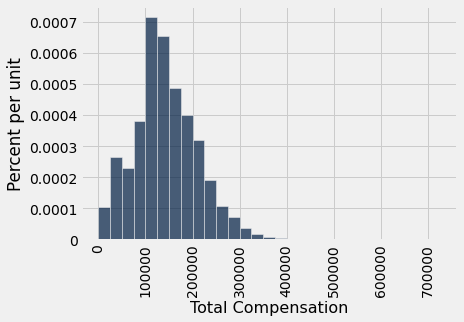

In [55]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

## Parameter: Median Total Compensation

In [56]:
#Median total compensation in the population
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median 

135747

## Estimating the Parameter (Pretend it is Unknown)

In [57]:
our_sample = sf.sample(400, with_replacement=False)

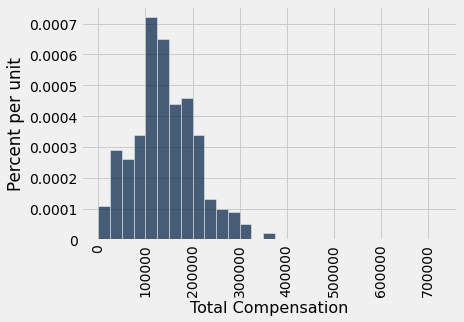

In [58]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [59]:
# Median total compensation in the SAMPLE
#It estimates the population median
percentile(50, our_sample.column('Total Compensation'))

138035

In [60]:
#YOu can do the above many times to see how much it varies

## Variability of the Estimate

In [61]:
#How do we get another sample

In [62]:
##The Bootstrap

## A way of generating new samples from old samples

In [63]:
#All that we have is the original sample
#... which is random


### So we sample at random from the original sample!

### We treat the original sample as a placeholder for the population

In [64]:
#But in the realworld we won't be able to keep going back to the population to get new samples
#to see how much the estimate varies. 
# How to generate a new sample without going back to the population

## Bootstrap

## Sample Randomly


   ### From the original sample
   ### WITH REPLACEMENT   
   ### The same number of times as the original sample

In [65]:
# Default behaviour of tbl.sample:
#at random with replacement
#the same number of rows of tbl

In [75]:
bootstrap_sample = our_sample.sample()

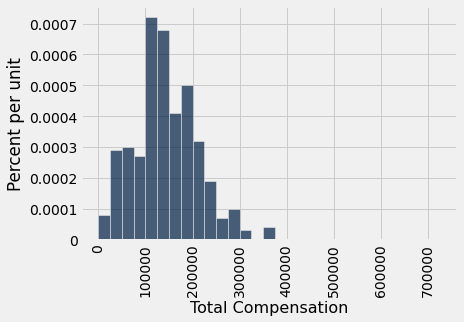

In [76]:
bootstrap_sample.hist('Total Compensation', bins=sf_bins)

In [77]:
percentile(50, bootstrap_sample.column('Total Compensation'))

139339

In [78]:
def one_bootstrap_median():
    #draws a bootstrap sample
    resample = our_sample.sample()
    
    #return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [79]:
one_bootstrap_median()

137851

In [80]:
num_repetitions = 3000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

In [81]:
bstrap_medians.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

Text(0.5, 1.0, 'Bootstrap Medians & the Parameter (Green Dot)')

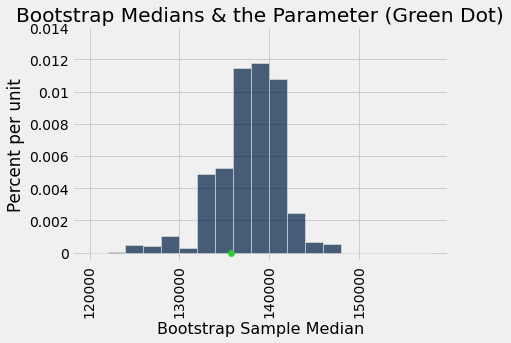

In [82]:
resapled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins = np.arange(120000, 160000, 2000)
resapled_medians.hist(bins = median_bins)

#Plotting parameters
parameter_green = '#32CD32'
plt.ylim(-0.000005, 0.00014)
plt.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plt.title('Bootstrap Medians & the Parameter (Green Dot)')

In [83]:
#In real-life, you may not have the green point
#Greenpoint = median of population

## Percentile Method: Middle 95% of the Bootstrap Estimates

In [85]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([129563., 143456.])

c:\users\admin\pycharmprojects\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


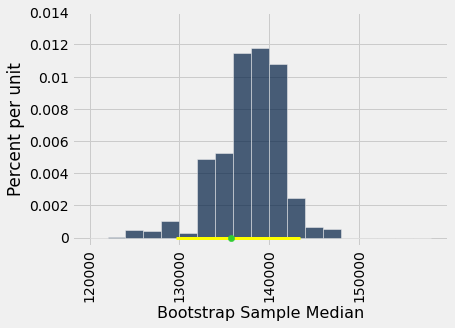

In [87]:
resapled_medians.hist(bins=median_bins)

#Plotting parameters

plt.ylim(-0.000005, 0.00014)
plt.plot(make_array(left, right), make_array(0,0), color='yellow', lw=3, zorder=1)
plt.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
